In [14]:
from sklearn.datasets import make_blobs
import numpy as np

# Elegir aleatoriamente entre 1 y 20 clústeres
n_clusters = np.random.randint(1, 20)

# Crear el dataset
X, y = make_blobs(
    n_samples=2000,
    n_features=30,
    centers=n_clusters,
    cluster_std=1.2,
    random_state=42
)

print(f"Cantidad de clústeres generados: {n_clusters}")
print("Forma del dataset:",X.shape)

Cantidad de clústeres generados: 9
Forma del dataset: (2000, 30)


In [15]:
import matplotlib.pyplot as plt 

def plot_clusters(X, y=None):
    plt.scatter(X[:, 0], X[:, 1], c=y, s=1)
    plt.xlabel("$x_1$", fontsize=14)
    plt.ylabel("$x_2$", fontsize=14, rotation=0)


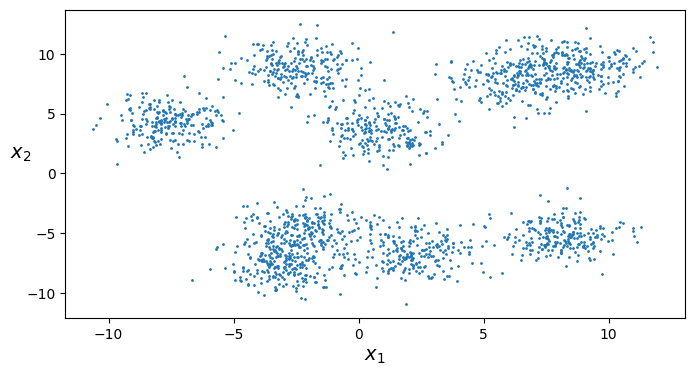

In [16]:
plt.figure(figsize=(8, 4))
plot_clusters(X)
plt.show()

In [17]:
from sklearn.cluster import KMeans

k = n_clusters
kmeans = KMeans(n_clusters=k, random_state=42)
y_pred = kmeans.fit_predict(X)
y_pred


array([4, 6, 0, ..., 2, 0, 1], shape=(2000,), dtype=int32)

In [18]:
kmeans.cluster_centers_

array([[ 8.8771082 ,  8.94299871,  8.29522595, -2.73617247, -9.60069412,
         8.56125193, -1.31466093,  9.32183997,  9.24405469,  7.12441502,
        -4.05141117, -2.47225592,  7.28198883, -3.5690064 , -6.64059926,
         1.10573109,  8.71626025,  3.96623587,  1.50351225, -8.10777355,
         2.15311999,  9.83155369, -7.26479871,  0.3834707 ,  7.64061191,
         4.80294918,  3.95635238,  3.98253981, -2.8858856 , -4.23626655],
       [-2.41597234,  8.89013191,  4.6115356 ,  2.16236451, -6.95948511,
        -6.94263728, -8.86779489,  7.27474066,  1.89284212,  4.11294848,
        -9.64326324,  9.3990541 ,  6.62929245, -5.72172961, -6.25290388,
        -6.24983154, -3.86710358,  0.43088476, -1.3345171 , -4.22545853,
         2.08188318, -7.16518886, -4.12934486, -2.6533172 , -0.79438154,
         5.64766267, -6.04935893,  0.22479943,  1.90181343, -9.04394283],
       [ 0.85465531,  3.68740835,  2.94453666, -5.50571759,  4.18526463,
        -5.41160431, -3.54421715,  5.05050006,  3

In [20]:
X_new = np.random.normal(0, 1, size=(4, 30))  # 4 nuevos puntos en 30D
kmeans.predict(X_new)


array([2, 2, 2, 2], dtype=int32)

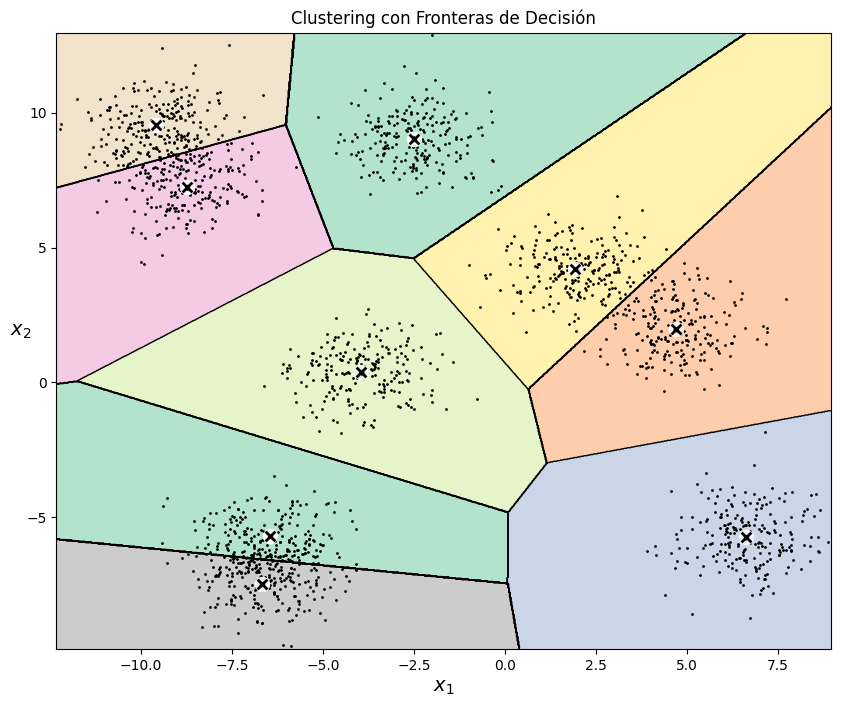

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Tus funciones aquí...
def plot_data(X):
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)

def plot_centroids(centroids, weights=None, circle_color='w', cross_color='k'):
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='o', s=10, linewidths=8,
                color=circle_color, zorder=10, alpha=0.9)
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=2, linewidths=10,
                color=cross_color, zorder=11, alpha=1)

def plot_decision_boundaries(clusterer, X, resolution=1000, show_centroids=True,
                             show_xlabels=True, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    grid_points = np.c_[xx.ravel(), yy.ravel()]
    grid_30d = np.hstack([grid_points, np.zeros((grid_points.shape[0], clusterer.cluster_centers_.shape[1] - 2))])
    Z = clusterer.predict(grid_30d)
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, cmap="Pastel2")
    plt.contour(xx, yy, Z, linewidths=1, colors='k')
    plot_data(X)
    if show_centroids:
        plot_centroids(clusterer.cluster_centers_)

    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)

# Paso 1: crear datos 2D
from sklearn.datasets import make_blobs
X, _ = make_blobs(n_samples=2000, centers=k, n_features=2, random_state=42)

# Paso 2: añadir dimensiones ficticias para simular más dimensiones (opcional)
X_extended = np.hstack([X, np.zeros((X.shape[0], 28))])  # simulamos 30 dimensiones

# Paso 3: entrenar el modelo
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(X_extended)

# Paso 4: graficar
plt.figure(figsize=(10, 8))
plot_decision_boundaries(kmeans, X)
plt.title("Clustering con Fronteras de Decisión")
plt.show()

In [22]:
kmeans.transform(X_new)

array([[11.09534206, 10.73333789,  7.31835799, 10.13336139, 13.09787514,
         7.30793029,  7.20463699, 15.03143662, 11.91440378],
       [10.81377044, 10.96977529,  6.96990567, 10.08858901, 13.01611841,
         7.31117863,  6.84058183, 14.9243768 , 12.1790232 ],
       [ 9.47250179,  8.86061578,  7.66054586, 11.12001537, 10.60154005,
         4.68351314,  6.52850466, 12.68423871, 10.29156945],
       [10.54315945, 10.03990551,  6.64173467,  9.67289326, 12.52919256,
         6.35384597,  6.4391973 , 14.53142488, 11.28496332]])

In [23]:
# kmeans_iter1 = KMeans(n_clusters=5, init="random", n_init=1,
#                      algorithm="full", max_iter=1, random_state=1)
# kmeans_iter1 = KMeans(n_clusters=5, init="random", n_init=1,
#                      algorithm="lloyd", max_iter=1, random_state=1)
# kmeans_iter1 = KMeans(n_clusters=5, init="random", n_init=5,
#                      algorithm="elkan", max_iter=1, random_state=1)
# Configuración del modelo K-Means con inicialización inteligente
kmeans_iter1 = KMeans(n_clusters=n_clusters, init="k-means++", n_init=1,
                      algorithm="elkan", max_iter=8, random_state=1)
# kmeans_iter2 = KMeans(n_clusters=5, init="random", n_init=1,
#                      algorithm="full", max_iter=2, random_state=1)
# kmeans_iter2 = KMeans(n_clusters=5, init="random", n_init=5,
#                      algorithm="elkan", max_iter=2, random_state=1)
kmeans_iter2 = KMeans(n_clusters=n_clusters, init="k-means++", n_init=1,
                     algorithm="elkan", max_iter=4, random_state=1)

# kmeans_iter3 = KMeans(n_clusters=5, init="random", n_init=1,
#                      algorithm="full", max_iter=3, random_state=1)
# kmeans_iter3 = KMeans(n_clusters=5, init="random", n_init=5,
#                      algorithm="elkan", max_iter=3, random_state=1)
kmeans_iter3 = KMeans(n_clusters=n_clusters, init="k-means++", n_init=1,
                     algorithm="elkan", max_iter=8, random_state=1)
kmeans_iter1.fit(X)
kmeans_iter2.fit(X)
kmeans_iter3.fit(X)

KMeans(algorithm='elkan', max_iter=8, n_clusters=9, n_init=1, random_state=1)

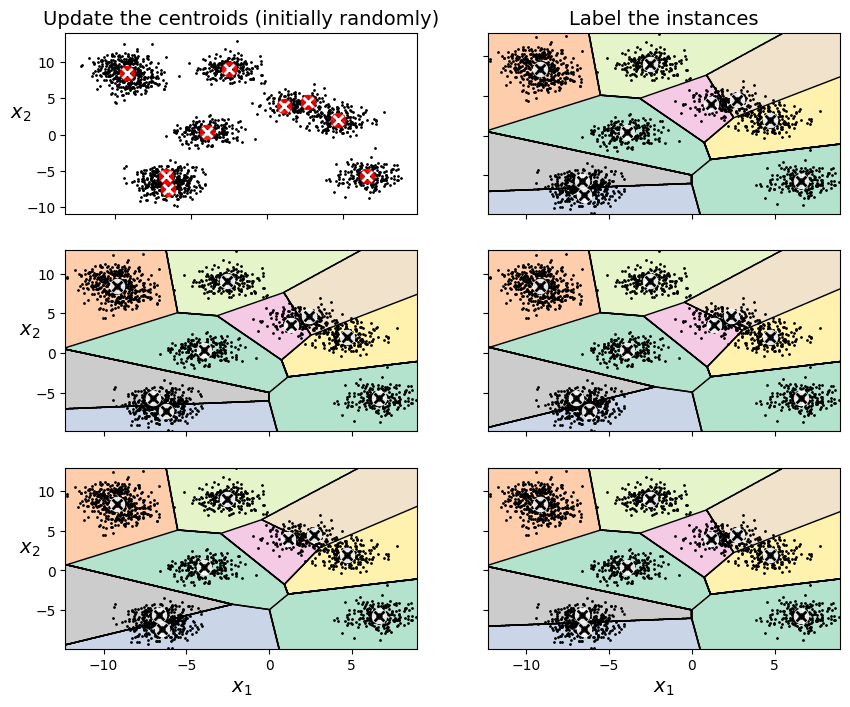

In [24]:
plt.figure(figsize=(10, 8))

plt.subplot(321)
plot_data(X)
plot_centroids(kmeans_iter1.cluster_centers_, circle_color='r', cross_color='w')
plt.ylabel("$x_2$", fontsize=14, rotation=0)
plt.tick_params(labelbottom=False)
plt.title("Update the centroids (initially randomly)", fontsize=14)

plt.subplot(322)
plot_decision_boundaries(kmeans_iter1, X, show_xlabels=False, show_ylabels=False)
plt.title("Label the instances", fontsize=14)

plt.subplot(323)
plot_decision_boundaries(kmeans_iter1, X, show_centroids=False, show_xlabels=False)
plot_centroids(kmeans_iter2.cluster_centers_)

plt.subplot(324)
plot_decision_boundaries(kmeans_iter2, X, show_xlabels=False, show_ylabels=False)

plt.subplot(325)
plot_decision_boundaries(kmeans_iter2, X, show_centroids=False)
plot_centroids(kmeans_iter3.cluster_centers_)

plt.subplot(326)
plot_decision_boundaries(kmeans_iter3, X, show_ylabels=False)

plt.show()

In [25]:
def plot_clusterer_comparison(clusterer1, clusterer2, X, title1=None, title2=None):
    clusterer1.fit(X)
    clusterer2.fit(X)

    plt.figure(figsize=(10, 3.2))

    plt.subplot(121)
    plot_decision_boundaries(clusterer1, X)
    if title1:
        plt.title(title1, fontsize=14)

    plt.subplot(122)
    plot_decision_boundaries(clusterer2, X, show_ylabels=False)
    if title2:
        plt.title(title2, fontsize=14)

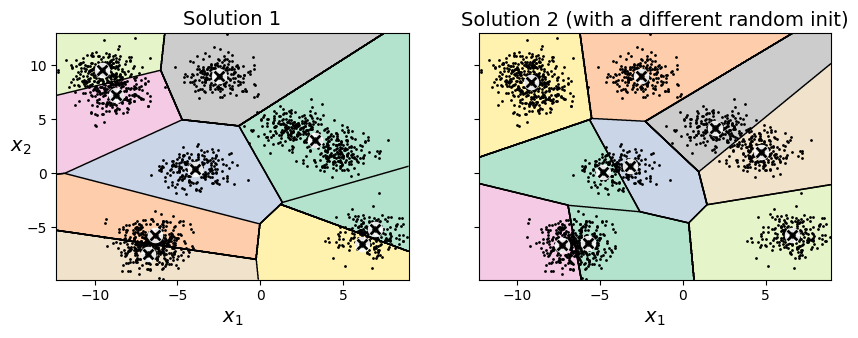

In [26]:
kmeans_rnd_init1 = KMeans(n_clusters=n_clusters, init="random", n_init=1,
                         algorithm="elkan", random_state=11)
kmeans_rnd_init2 = KMeans(n_clusters=n_clusters, init="random", n_init=1,
                         algorithm="elkan", random_state=19)

plot_clusterer_comparison(kmeans_rnd_init1, kmeans_rnd_init2, X,"Solution 1", "Solution 2 (with a different random init)")

plt.show()

In [27]:
kmeans_rnd_10_inits = KMeans(n_clusters=n_clusters, init="random", n_init=10,
                              algorithm="elkan", random_state=11)
kmeans_rnd_10_inits.fit(X)

KMeans(algorithm='elkan', init='random', n_clusters=9, n_init=10,
       random_state=11)

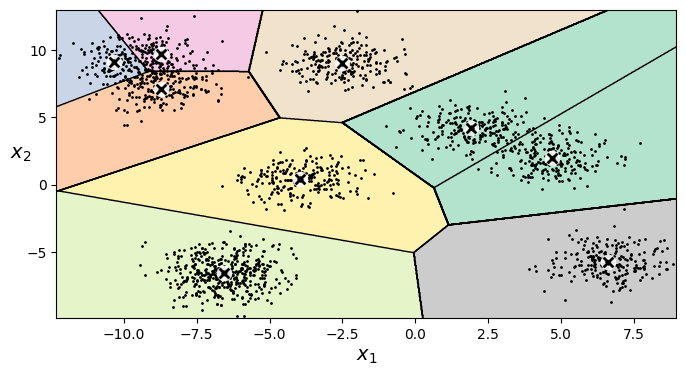

In [28]:
plt.figure(figsize=(8, 4))
plot_decision_boundaries(kmeans_rnd_10_inits, X)
plt.show()

In [29]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', version=1)
mnist.target = mnist.target.astype(np.int64)

In [30]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    mnist["data"], mnist["target"], random_state=42)

In [31]:
def load_next_batch(batch_size):
    return X[np.random.choice(len(X), batch_size, replace=False)]

In [45]:
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.cluster import MiniBatchKMeans

# Generar datos de ejemplo
X, _ = make_blobs(n_samples=2000, centers=k, n_features=2, random_state=42)

# Simulación de carga de batches
def load_next_batch(batch_size):
    indices = np.random.randint(0, X.shape[0], batch_size)
    return X[indices]

# Parámetros
k = 5
n_init = 10
n_iterations = 100
batch_size = 100
init_size = 500
evaluate_on_last_n_iters = 10

best_kmeans = None

for init in range(n_init):
    minibatch_kmeans = MiniBatchKMeans(n_clusters=k, init_size=init_size, random_state=init)
    X_init = load_next_batch(init_size)
    minibatch_kmeans.partial_fit(X_init)

    minibatch_kmeans.sum_inertia_ = 0
    for iteration in range(n_iterations):
        X_batch = load_next_batch(batch_size)
        minibatch_kmeans.partial_fit(X_batch)
        if iteration >= n_iterations - evaluate_on_last_n_iters:
            minibatch_kmeans.sum_inertia_ += minibatch_kmeans.inertia_

    if (best_kmeans is None or
        minibatch_kmeans.sum_inertia_ < best_kmeans.sum_inertia_):
        best_kmeans = minibatch_kmeans

print("Entrenamiento terminado. Mejor suma de inercias:", best_kmeans.sum_inertia_)

Entrenamiento terminado. Mejor suma de inercias: 2332.0015634464253


In [46]:
best_kmeans.score(X)

-4643.401005495188

In [52]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Datos
X, _ = make_blobs(n_samples=2000, centers=k, n_features=2, random_state=42)

# Entrenamiento
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)

# Silhouette
score = silhouette_score(X, kmeans.labels_)
print("Silhouette Score:", score)

Silhouette Score: 0.7032999865558672


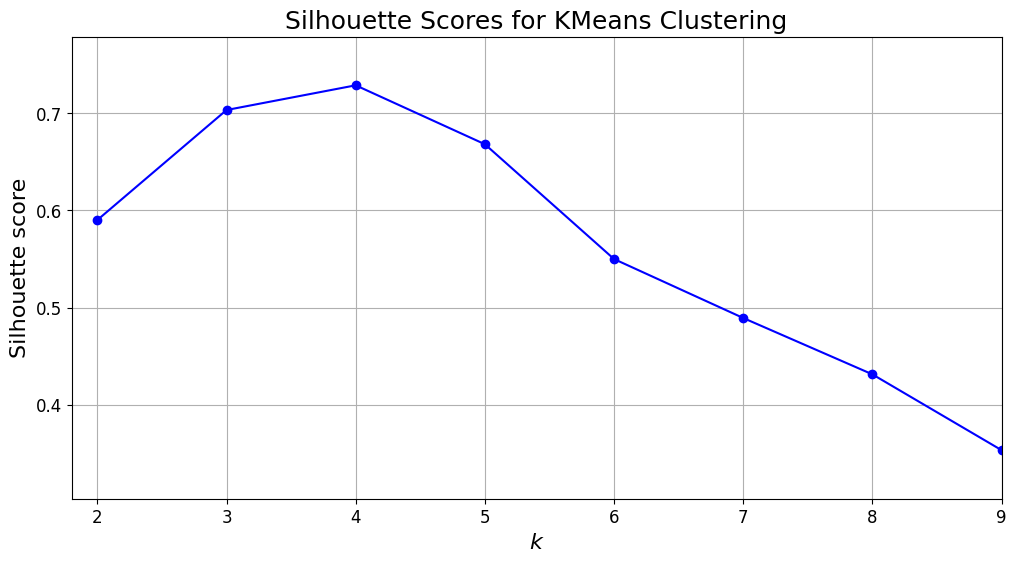

In [54]:
kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(X) for k in range(1, 10)]
silhouette_scores = [silhouette_score(X, model.labels_) for model in kmeans_per_k[1:]]

plt.figure(figsize=(12, 6))  # Aumenta el tamaño de la figura
plt.plot(range(2, 10), silhouette_scores, "bo-")
plt.xlabel("$k$", fontsize=16)
plt.ylabel("Silhouette score", fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.axis([1.8, 9, min(silhouette_scores) - 0.05, max(silhouette_scores) + 0.05])  # Ajusta el eje Y dinámicamente
plt.title("Silhouette Scores for KMeans Clustering", fontsize=18)
plt.grid(True)
plt.show()

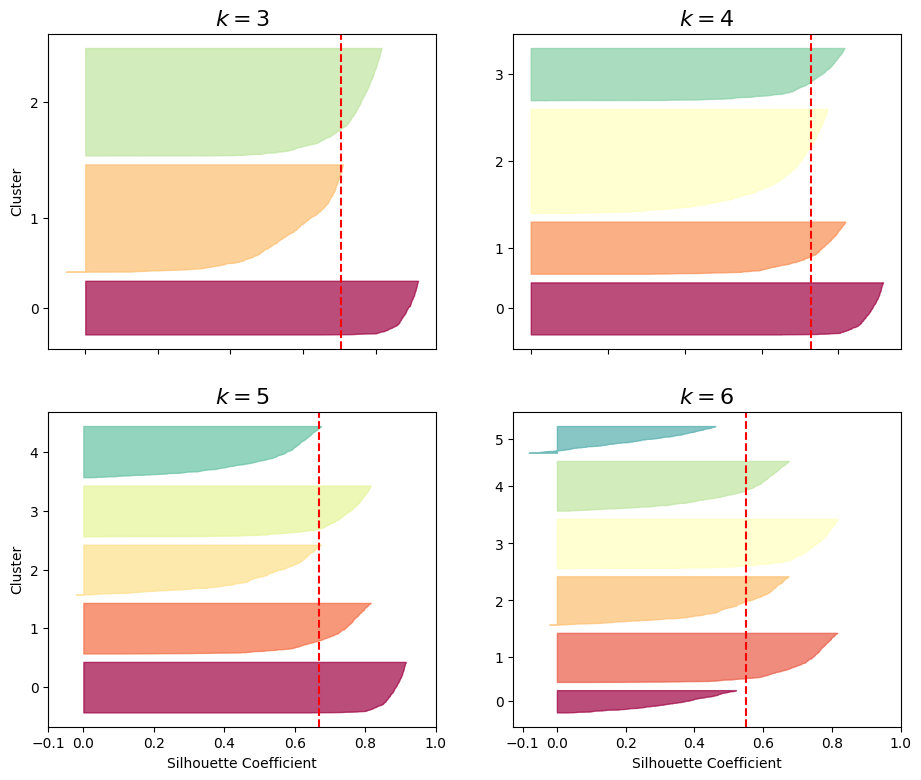

In [55]:
from sklearn.metrics import silhouette_samples
from matplotlib.ticker import FixedLocator, FixedFormatter
import matplotlib as mpl

plt.figure(figsize=(11, 9))

for k in (3, 4, 5, 6):
    plt.subplot(2, 2, k - 2)

    y_pred = kmeans_per_k[k - 1].labels_
    silhouette_coefficients = silhouette_samples(X, y_pred)

    padding = len(X) // 30
    pos = padding
    ticks = []
    for i in range(k):
        coeffs = silhouette_coefficients[y_pred == i]
        coeffs.sort()

        color = mpl.cm.Spectral(i / k)
        plt.fill_betweenx(np.arange(pos, pos + len(coeffs)), 0, coeffs,
                          facecolor=color, edgecolor=color, alpha=0.7)
        ticks.append(pos + len(coeffs) // 2)
        pos += len(coeffs) + padding

    plt.gca().yaxis.set_major_locator(FixedLocator(ticks))
    plt.gca().yaxis.set_major_formatter(FixedFormatter(range(k)))
    if k in (3, 5):
        plt.ylabel("Cluster")

    if k in (5, 6):
        plt.gca().set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
        plt.xlabel("Silhouette Coefficient")
    else:
        plt.tick_params(labelbottom=False)

    plt.axvline(x=silhouette_scores[k - 2], color="red", linestyle="--")
    plt.title("$k={}$".format(k), fontsize=16)

plt.show()